In [12]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from lstm import *
import time
import tensorflow

In [13]:
#Step 1 Load Data
X_train, y_train, X_test, y_test =load_data('sp500.csv', 50, True)

In [14]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print ('compilation time : ', time.time() - start)

compilation time :  0.031253814697265625


In [15]:
#Step 3 Train the model
model.fit(
    X_train,
    y_train,
    batch_size=512,
    nb_epoch=1,
    validation_split=0.05)

Train on 3523 samples, validate on 186 samples
Epoch 1/1
3523/3523 [==============================] - 6s 2ms/step - loss: 0.0026 - val_loss: 8.7944e-04


yo


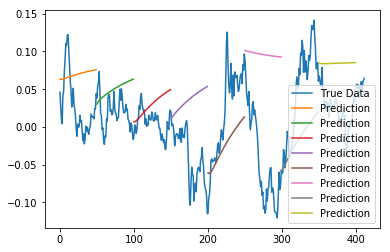

In [16]:
#Step 4 - Plot the predictions!
predictions = predict_sequences_multiple(model, X_test, 50, 50)
plot_results_multiple(predictions, y_test, 50)

In [19]:
pred=[]
for i in range(len(predictions)):
    for j in range(len(predictions[i])):
        pred.append(predictions[i][j])
pred=np.array(pred)
y_test=np.array(y_test[0:400])
mse = (np.sum((pred - y_test)**2))/(int(len(y_test)))
print("MEAN SQUARE ERROR IS :" + str(mse))

MEAN SQUARE ERROR IS :0.006273838987294733
